## Exploratory Data Analysis on Student's Performance Dataset:

### Problem Statement:<br>
- The problem specifies, how a student's performance is affected by factors like: Gender, Ethnicity, Parental Level of Education, Lunch and Test Preparation course.

#### Importing our necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/student.csv') #Reading the Dataset

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.shape

(1000, 8)

#### Performing Data checks:


1. Checking for missing values:

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- no missing values within the dataset as of now

2. Checking for Duplicate values:

In [6]:
df.duplicated().sum()

0

- No duplicate values in our dataset

3. Checking for the null values, and the Dtypes:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


4. Checking for the number of unique values in each column:

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

5. Checking the Statistics of the data:

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights from the statistics of the data:** <br>
- the means do not variate much, they all lie in the ranges of: 68 to 69.1 <br>
- all standard variations are close to each other: 14.6 to 15.19<br>
- the minimum marks obtained by students in maths: 0.000, reading: 17.000, writing: 10.000

#### Exploring our dataset:

In [10]:
#Checking the Categorical values in the categorical columns:

print("Categories in \'gender\' column: ", end = ' ')
print(df['gender'].unique())

print("Categories in \'race_ethnicity\' column: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in \'parental_level_of_education\' column: ", end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in \'lunch\' column: ", end=" ")
print(df['lunch'].unique())

print('Categories in \'test_preparation_course\' column: ', end=' ')
print(df['test_preparation_course'].unique())

Categories in 'gender' column:  ['female' 'male']
Categories in 'race_ethnicity' column:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' column:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' column:  ['none' 'completed']


In [11]:
#Defining the Numerical and Categorical data seperately:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

#Printing total number of Numerical and Categorical Features in our dataset:
print(f"Total Numeric Features: {len(numeric_features)}\n numeric features: {numeric_features}")
print(f"Total categorical features: {len(categorical_features)}\n categorical features: {categorical_features}")

Total Numeric Features: 3
 numeric features: ['math_score', 'reading_score', 'writing_score']
Total categorical features: 5
 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


1. Adding columns for **Total_Score** and **Average_Score**: [Feature Engineering]

In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
#Finding out the number of students who scored a full in the 3 subjects:

reading_full = df[df['reading_score']==100]['average_score'].count()
math_full = df[df['math_score']==100]['average_score'].count()
writing_full = df[df['writing_score']==100]['average_score'].count()

print(f"The number of students who scored full in reading: {reading_full}")
print(f"The number of students who scored full in maths: {math_full}")
print(f"The number of students who scored full in writing: {writing_full}")

The number of students who scored full in reading: 17
The number of students who scored full in maths: 7
The number of students who scored full in writing: 14


In [14]:
#Finding out the number of students who scored less than or equal to 20, in all subjects:

reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()


print(f"The number of students who scored less than or equal to 20 in reading : {reading_less_20}")
print(f"The number of students who scored less than or equal to 20 in math : {math_less_20}")
print(f"The number of students who scored less than or equal to 20 in writing : {writing_less_20}")

The number of students who scored less than or equal to 20 in reading : 1
The number of students who scored less than or equal to 20 in math : 4
The number of students who scored less than or equal to 20 in writing : 3


**Insights:**<br>
- Maths is the subject in which students have performed poorly
- Reading is the subject in which students have performed good.


2. Visualising our data: <br>
- histograms<br>
- Kernel distribution functions[kde]

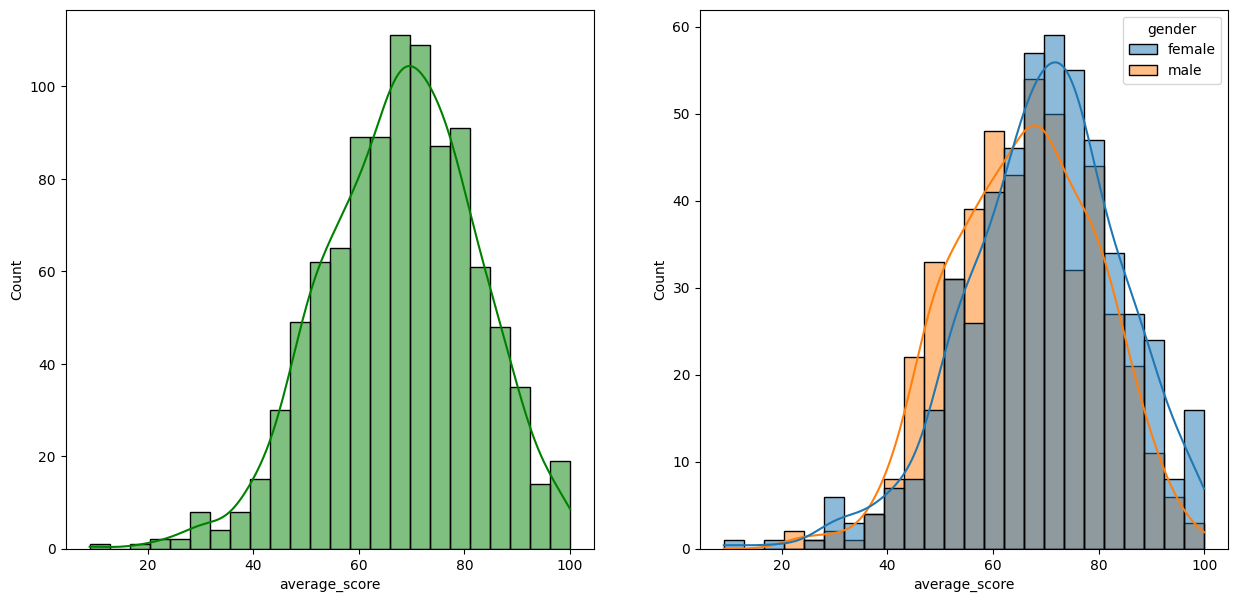

In [15]:
### Male vs. female performance


fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

**Remarks:**<br>
- females tend to score better than males in all subjects

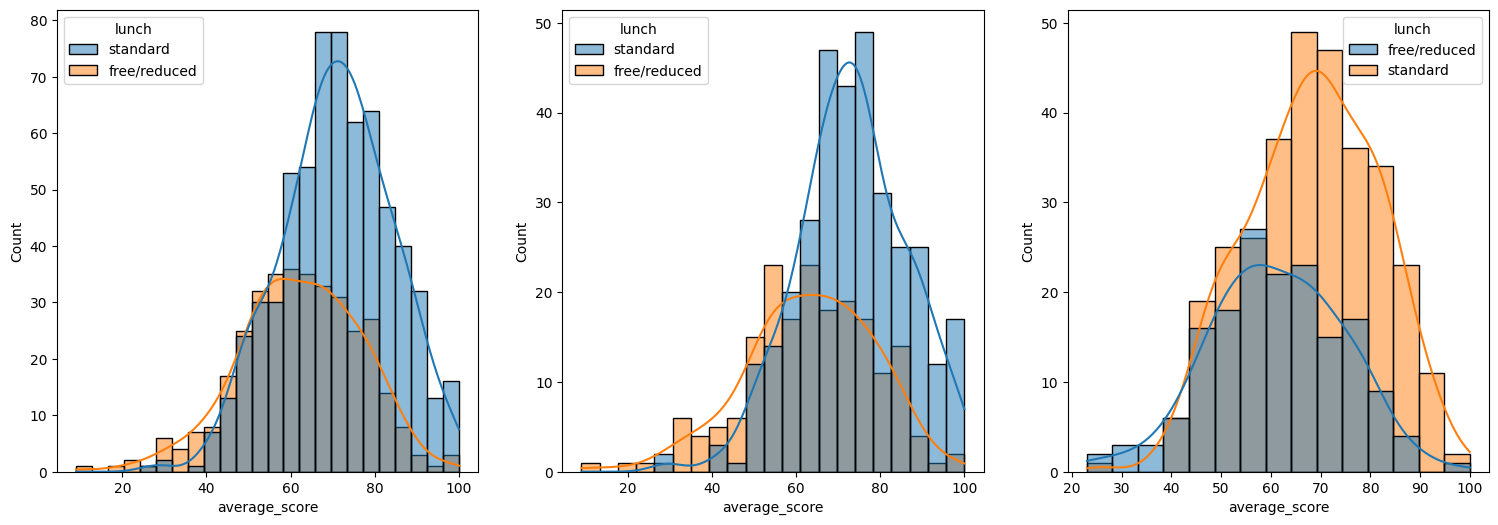

In [16]:
### Effect of lunch on the scores:



plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch')
plt.show()

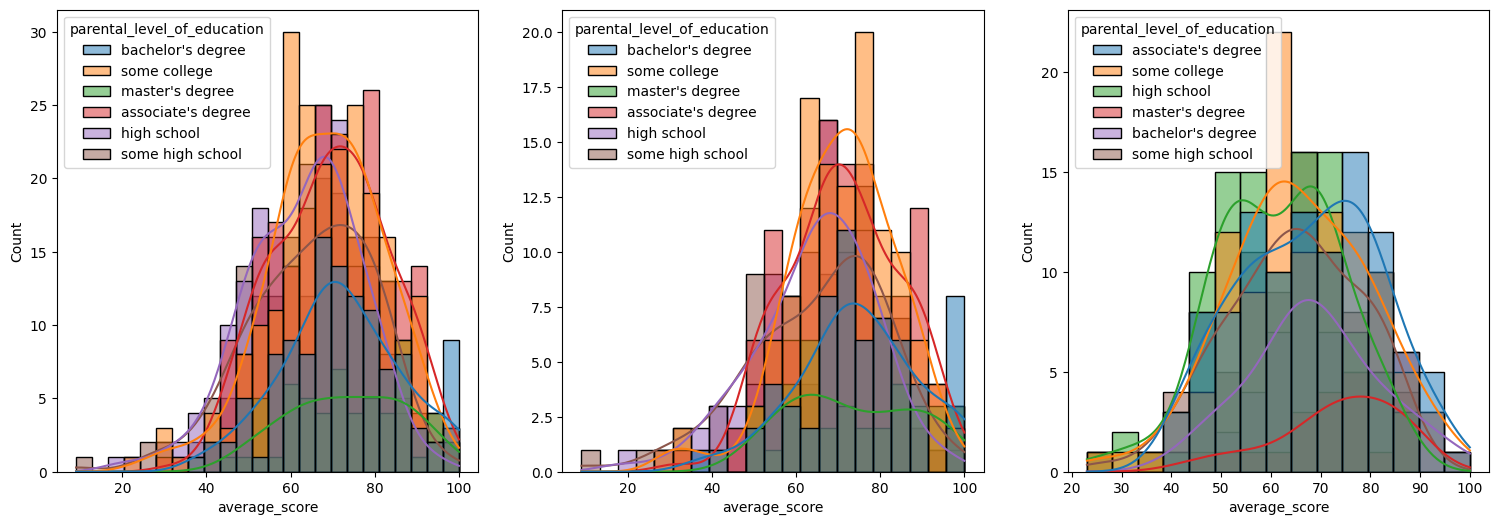

In [17]:
### Effect of Parental level of education on the scores:


plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x="average_score", kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education')
plt.show()

**remarks**: <br>
- the parental_level_of_education does not affect scores of the either gender

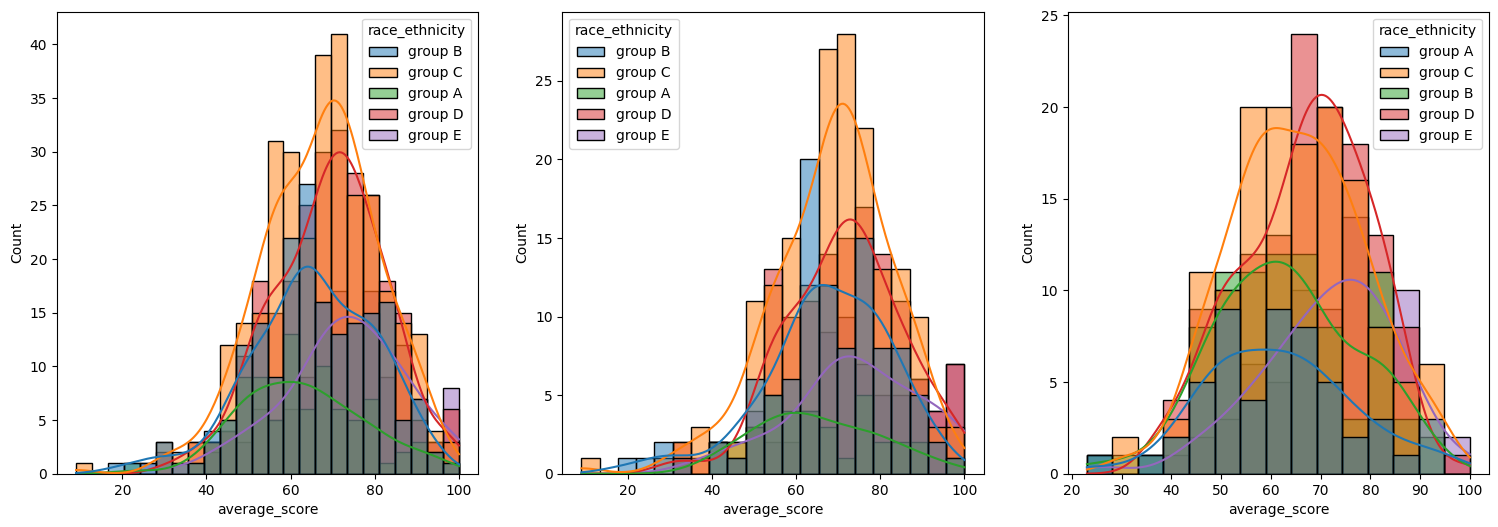

In [18]:
### Effect of Race_Ethnicity on scores:


plt.subplots(1, 3, figsize=(25,  6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='race_ethnicity')
plt.show()

**remarks**<br>
- Group A and Group E students perform poorly irrespective of Gender.

2. Visualising the maximum score achieved by students in all 3 subjects:

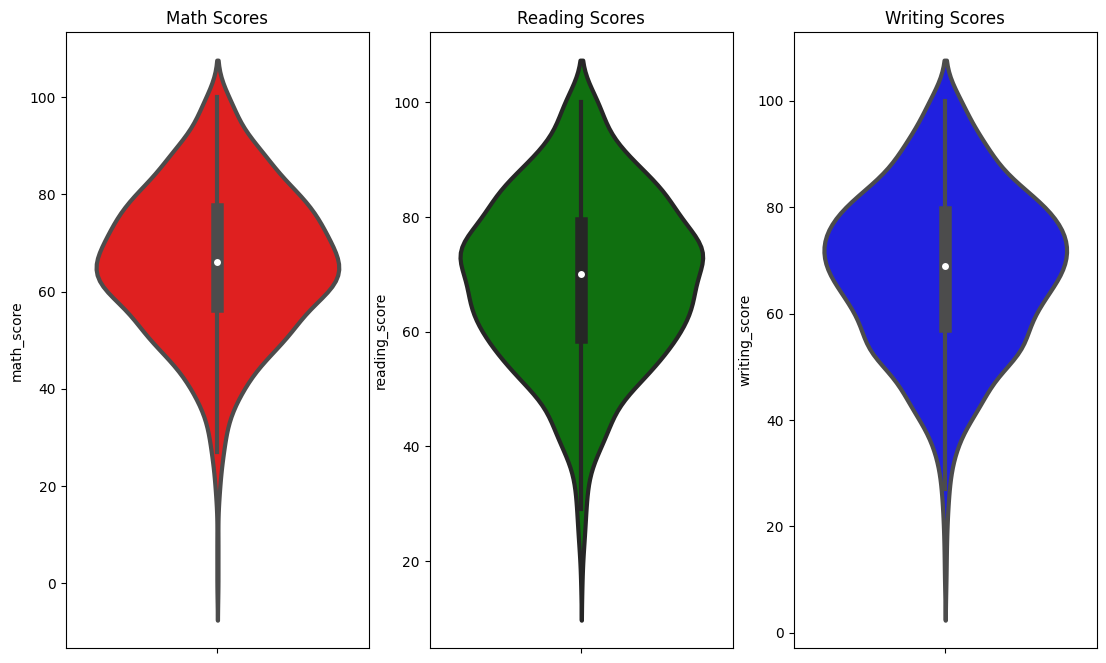

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title('Math Scores')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(142)
plt.title("Reading Scores")
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(143)
plt.title("Writing Scores")
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

**Remarks**<br>
- most of the students were in the scoring ranges of 60-80 for math<br>
- majority of the students were in the scoring ranges of 50-80 for writing and reading

3. Multivariate analysis using pieplot:

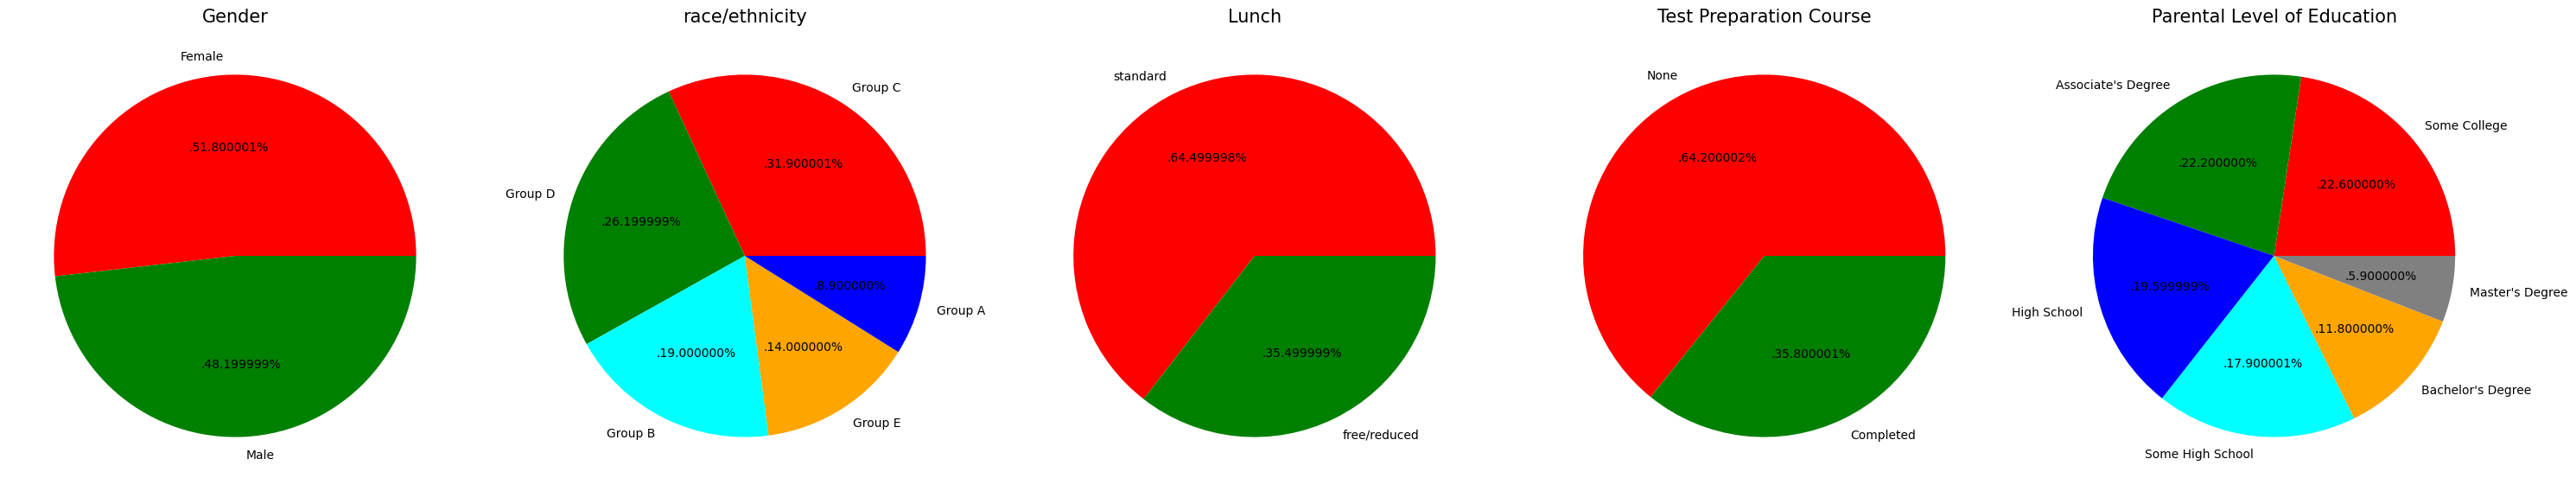

In [20]:
plt.rcParams['figure.figsize'] = (30,12)

#pie chart distribution for gender:
plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female', 'Male' 
color = ['red', 'green']


plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=15)
plt.axis('off')


#Pie chart distribution for race_ethnicity feature:
plt.subplot(152)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A' 
color = ['red', 'green', 'cyan', 'orange', 'blue']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('race/ethnicity', fontsize=15)
plt.axis('off')

#Pie chart distribution for lunch:
plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = ['red', 'green']

plt.pie(size, labels=labels, colors=color, autopct='.%2f%%')
plt.title('Lunch', fontsize=15)
plt.axis('off')

#Pie chart distribution for test_preparation course:
plt.subplot(154)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed' 
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test Preparation Course', fontsize=15)
plt.axis('off')

#Pie Chart Distribution for Parental Level of education
plt.subplot(155)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental Level of Education', fontsize=15)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()


**remarks**:<br>
- The number of females are approx equal to the male students<br>
- students taking standard lunch are greater in number<br>
- a greater number of students belong to the Group C race<br>
- More number of students did not take the test preparation course<br>
- More number of students' parents belong to "Some College"

4. Feature-wise Analysis:


**i. Gender column**:

Univariate Analysis:

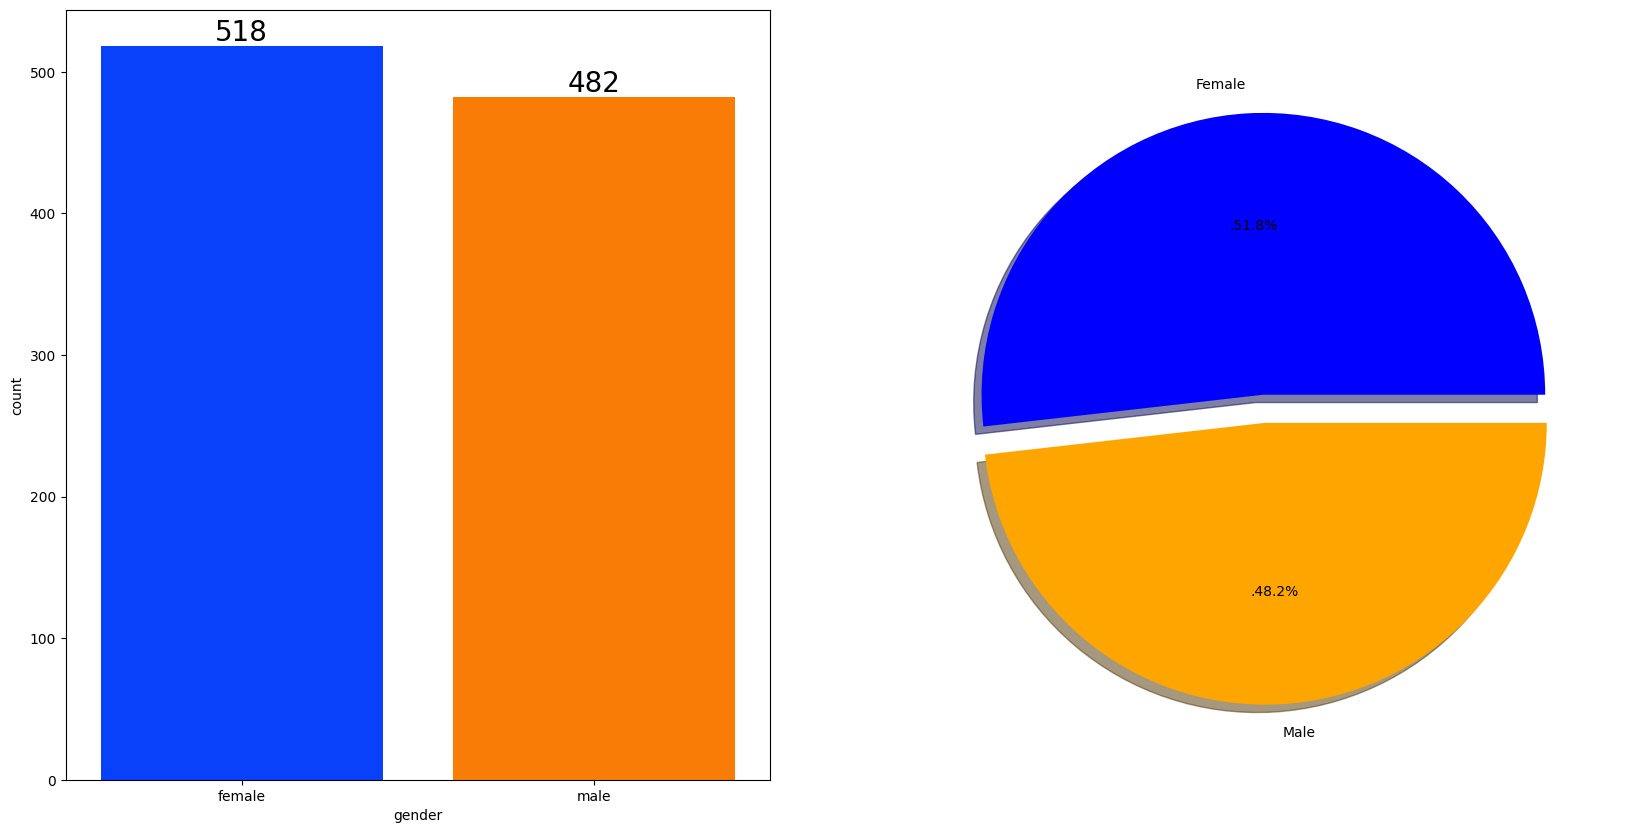

In [21]:
#Performing Univariate analysis to see the distribution of gender:

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container=container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Female', 'Male'], explode=(0, 0.1), autopct='.%1.1f%%', shadow=True, colors=['blue', 'orange'])
plt.show()

**Remarks**<br>
- Gender has a balanced distribution(approx.) as 51.8% students are male and 48.2% are female.<br>
- exact numbers, male = 482, and female = 518<br>

Bivariate Analysis: [Impact of Gender on Test Performance]:

In [22]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


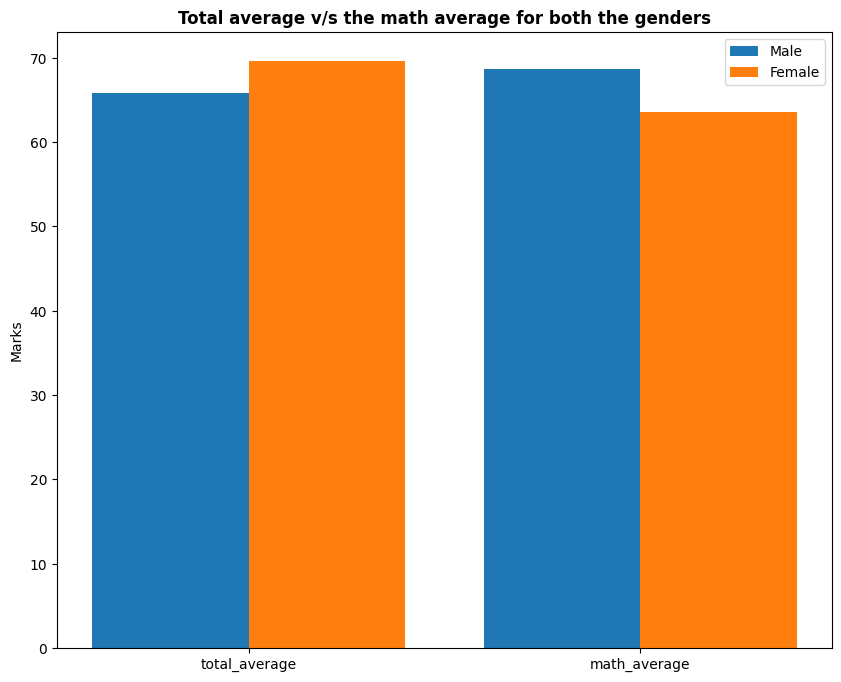

In [23]:
plt.figure(figsize=(10, 8))


X=['total_average', 'math_average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis-0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis+0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title('Total average v/s the math average for both the genders', fontweight='bold')
plt.legend()
plt.show()

**Remarks**:<br>
- Overall average is better for Female Students<br>
- Men scored higher in Maths

**ii. Race/Ethnicity column**:

 Univariate analysis(to check the group distribution):

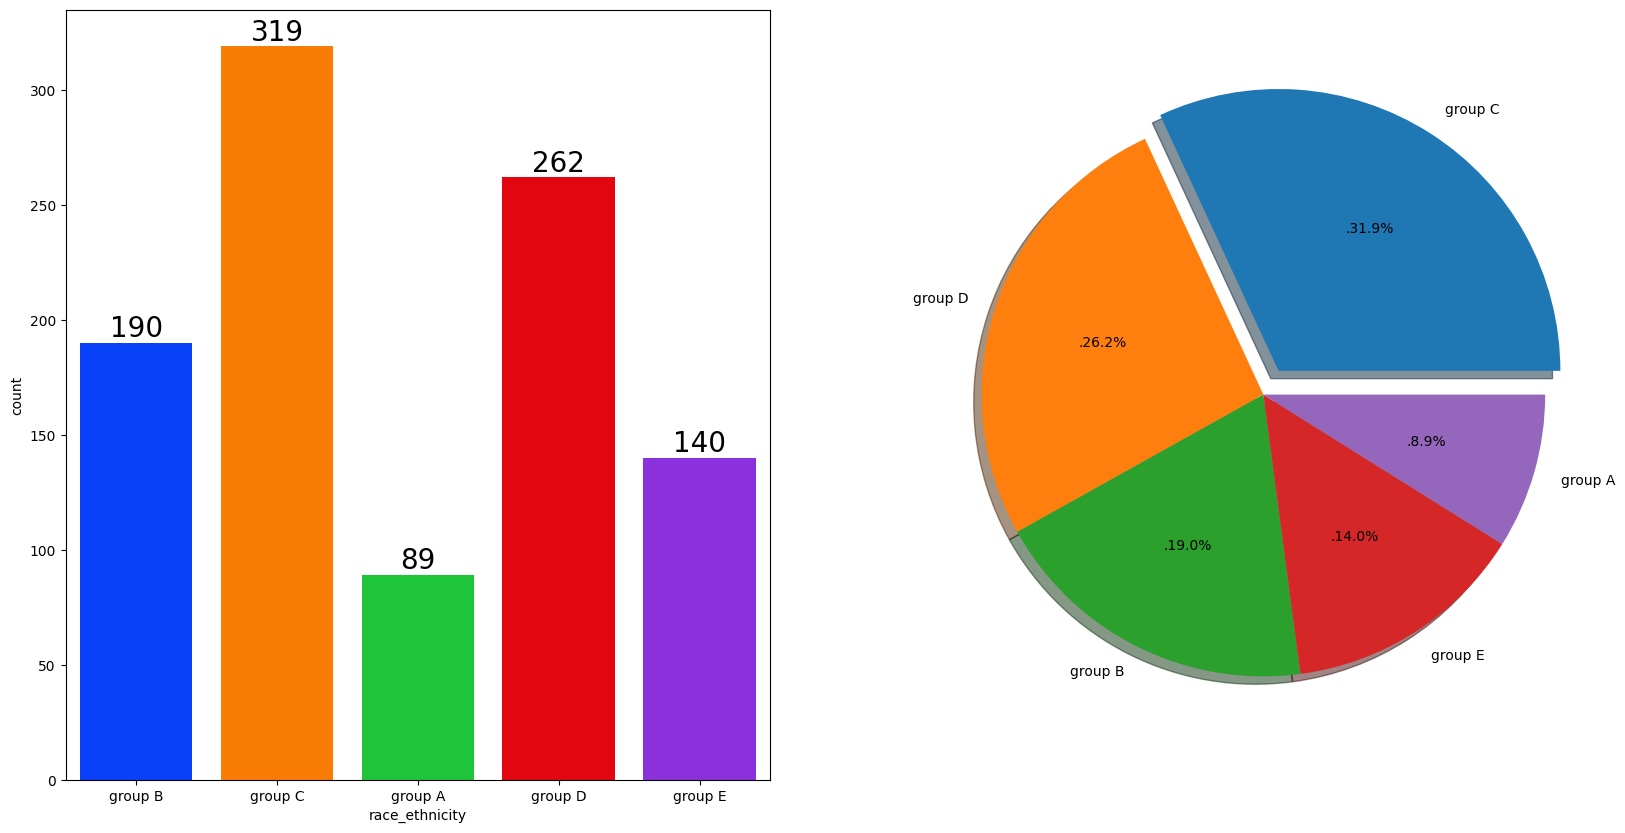

In [24]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], 
        autopct='.%1.1f%%', shadow=True)
plt.show()

**Remarks**:<br>
- Most of the students belong to Group C<br>
- Group A has the least number of students

Bivariate analysis: [if race/ethnicity of a student has any impact on his performance in the test]

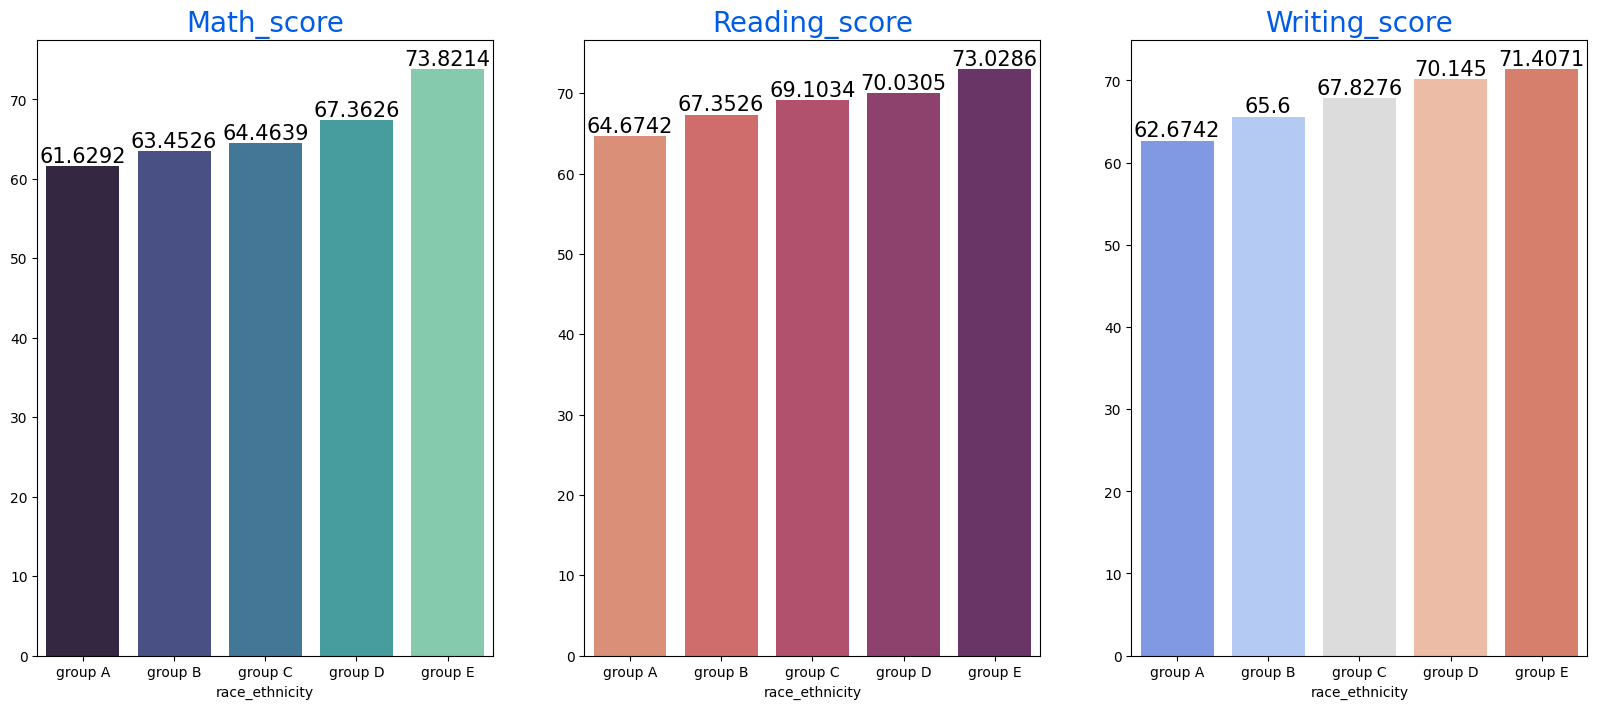

In [25]:
race_group = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=race_group['math_score'].mean().index, y=race_group['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math_score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)


sns.barplot(x=race_group['reading_score'].mean().index, y=race_group['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title("Reading_score", color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)


sns.barplot(x=race_group['writing_score'].mean().index, y=race_group['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title("Writing_score", color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)
    



**Remarks**:<br>
- The students who perform well in all 3 subjects belong to group D and E<br>
- The students who belong to group A perform comparitevely bad than other groups<br>
- Group A might be a backward socio-economic race

**iii. Parental Level of Education**:

Univariate Analysis: [Distribution of the parental level of education]

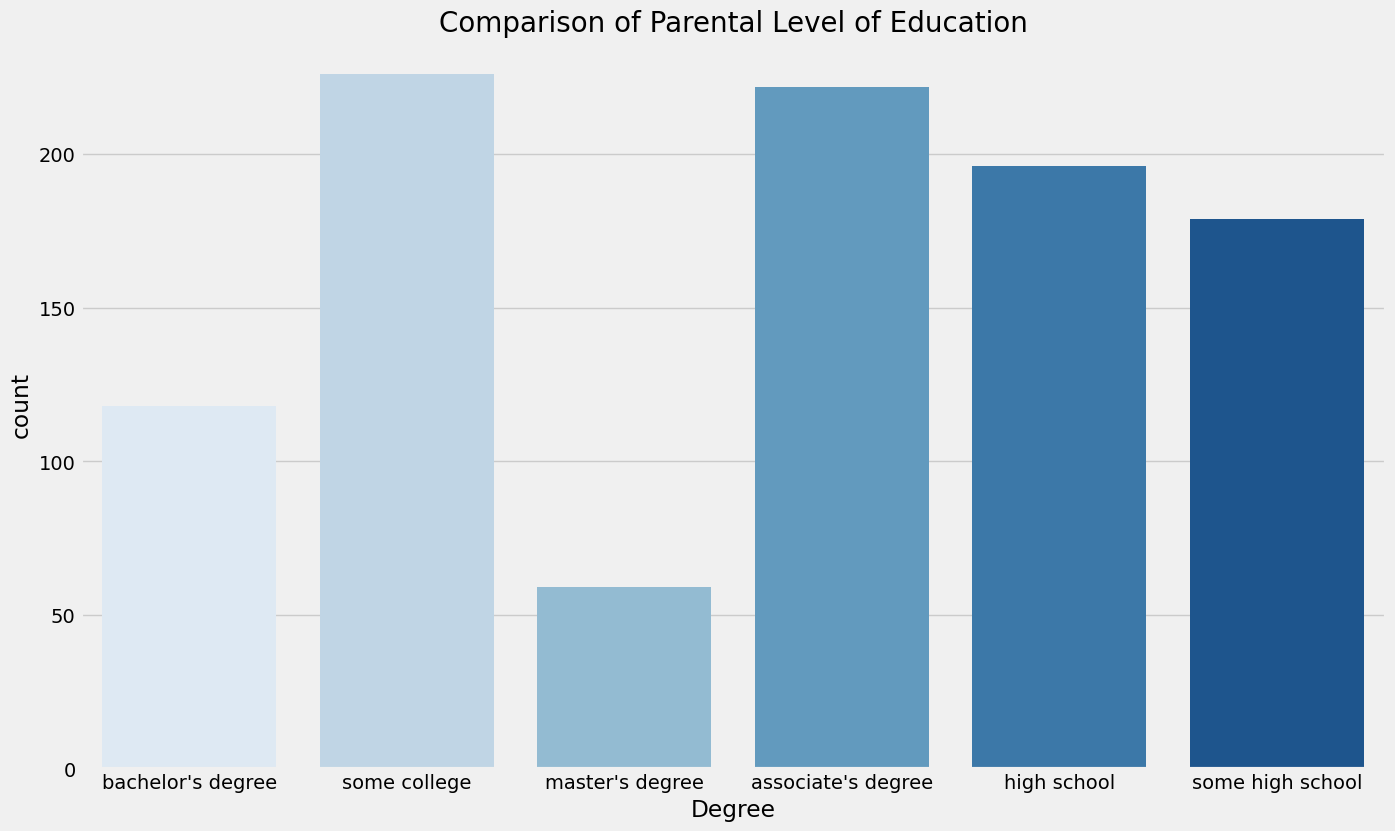

In [26]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of Parental Level of Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Remarks**:<br>
- most students' parents belong to: some college

Bivariate analysis: [impact of parental level of education on students performance]

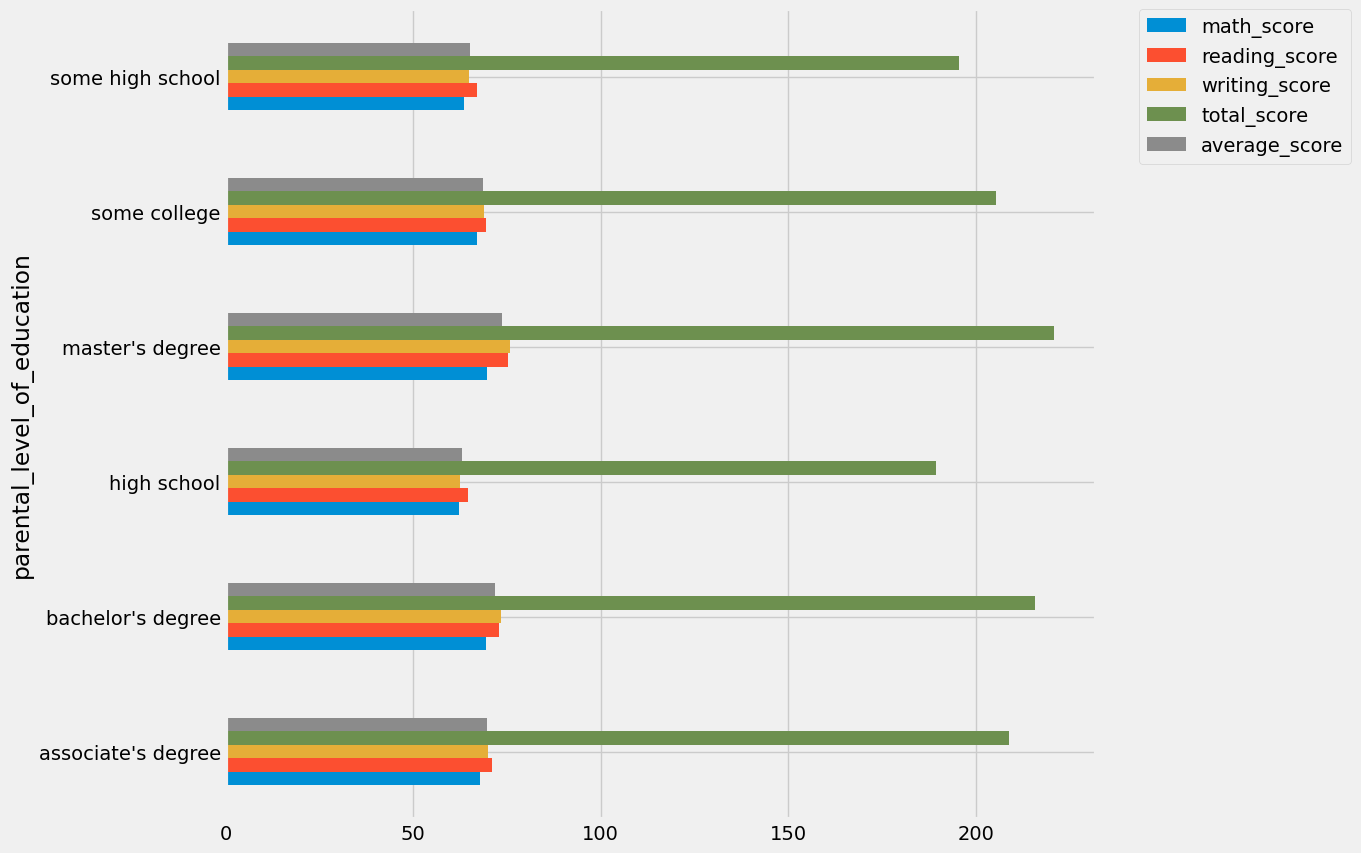

In [27]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Remarks**:<br>
- students whose parents possess a Master's or a Batchelor's degree perform better than others.

**iv. Lunch Column:**

Univariate Analysis:[which type of Lunch is more common amongst students]

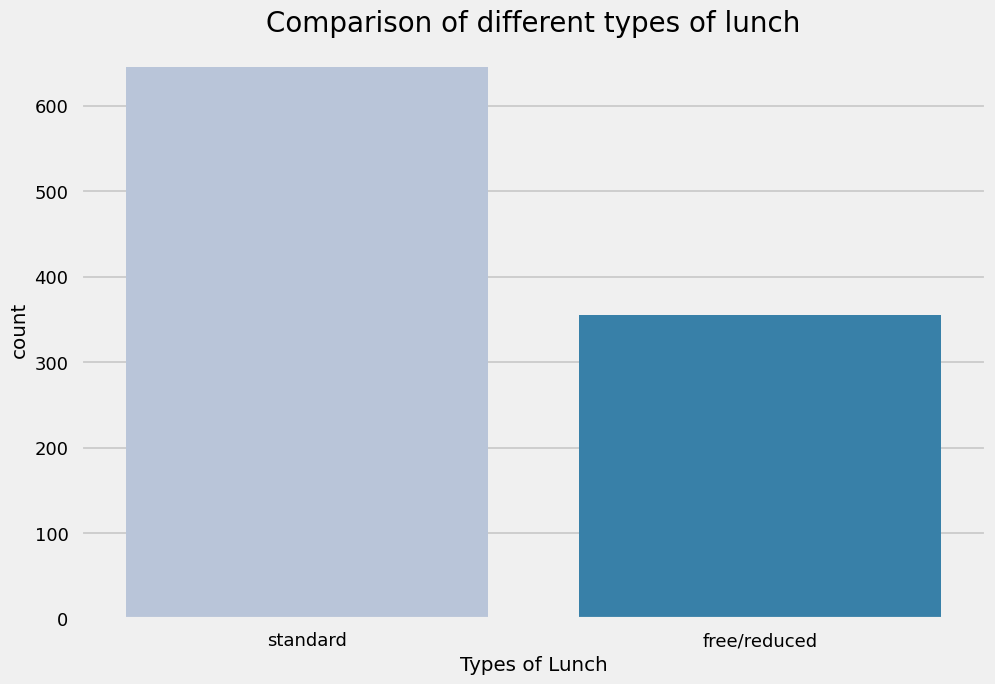

In [28]:
plt.rcParams['figure.figsize']=(15, 9)
plt.style.use("seaborn-talk")
sns.countplot(x=df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('count')
plt.show()

Bivariate analysis: [If lunch type has any effect on students performance]:


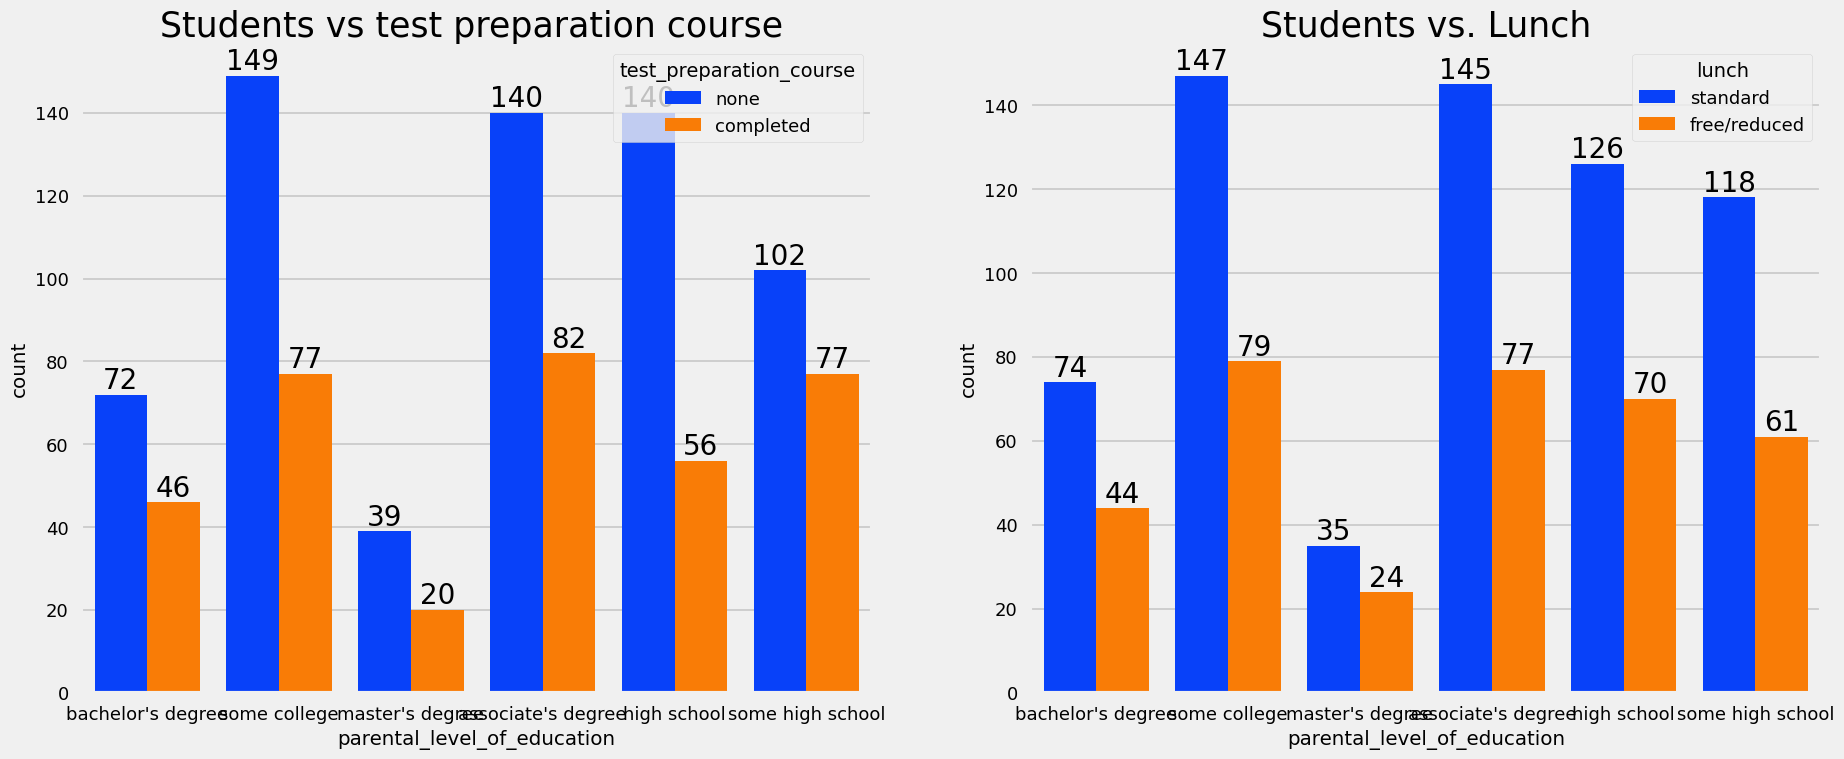

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title("Students vs. Lunch", size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

**remarks**:<br>
- students opting for a standard lunch tend to perform better.

**V. Test Preparation Column**:

Bivariate Analysis:

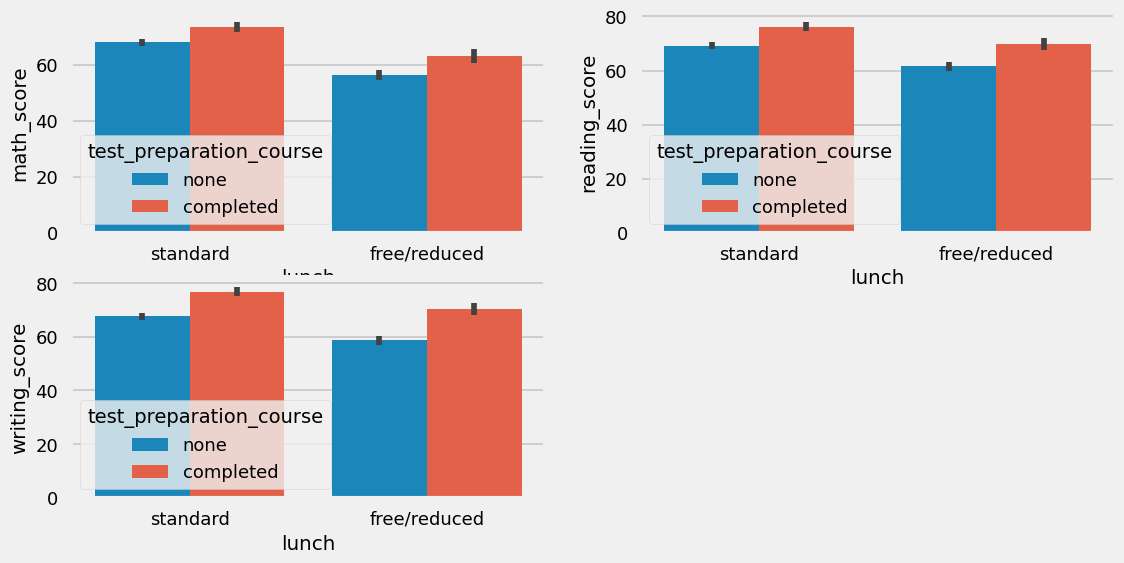

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

**remarks:**<br>
- students who completed a test preparation course perform better in all 3 subjects:

**Checking Outliers**:

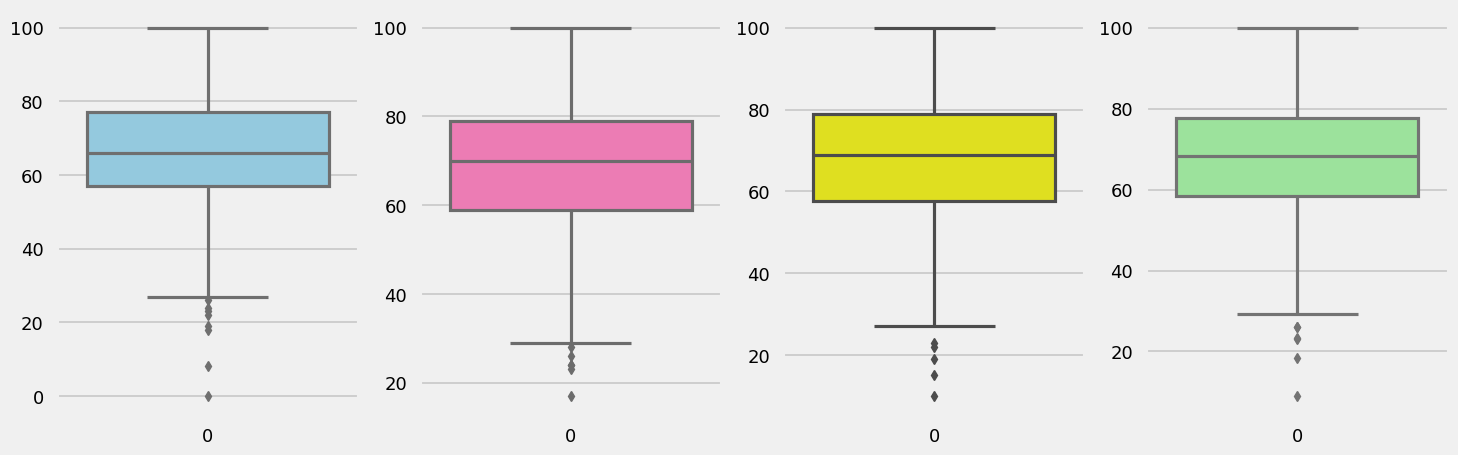

In [35]:
plt.subplots(1, 4, figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'], color='lightgreen')
plt.show()

**Multivariate analysis using pairplots:**

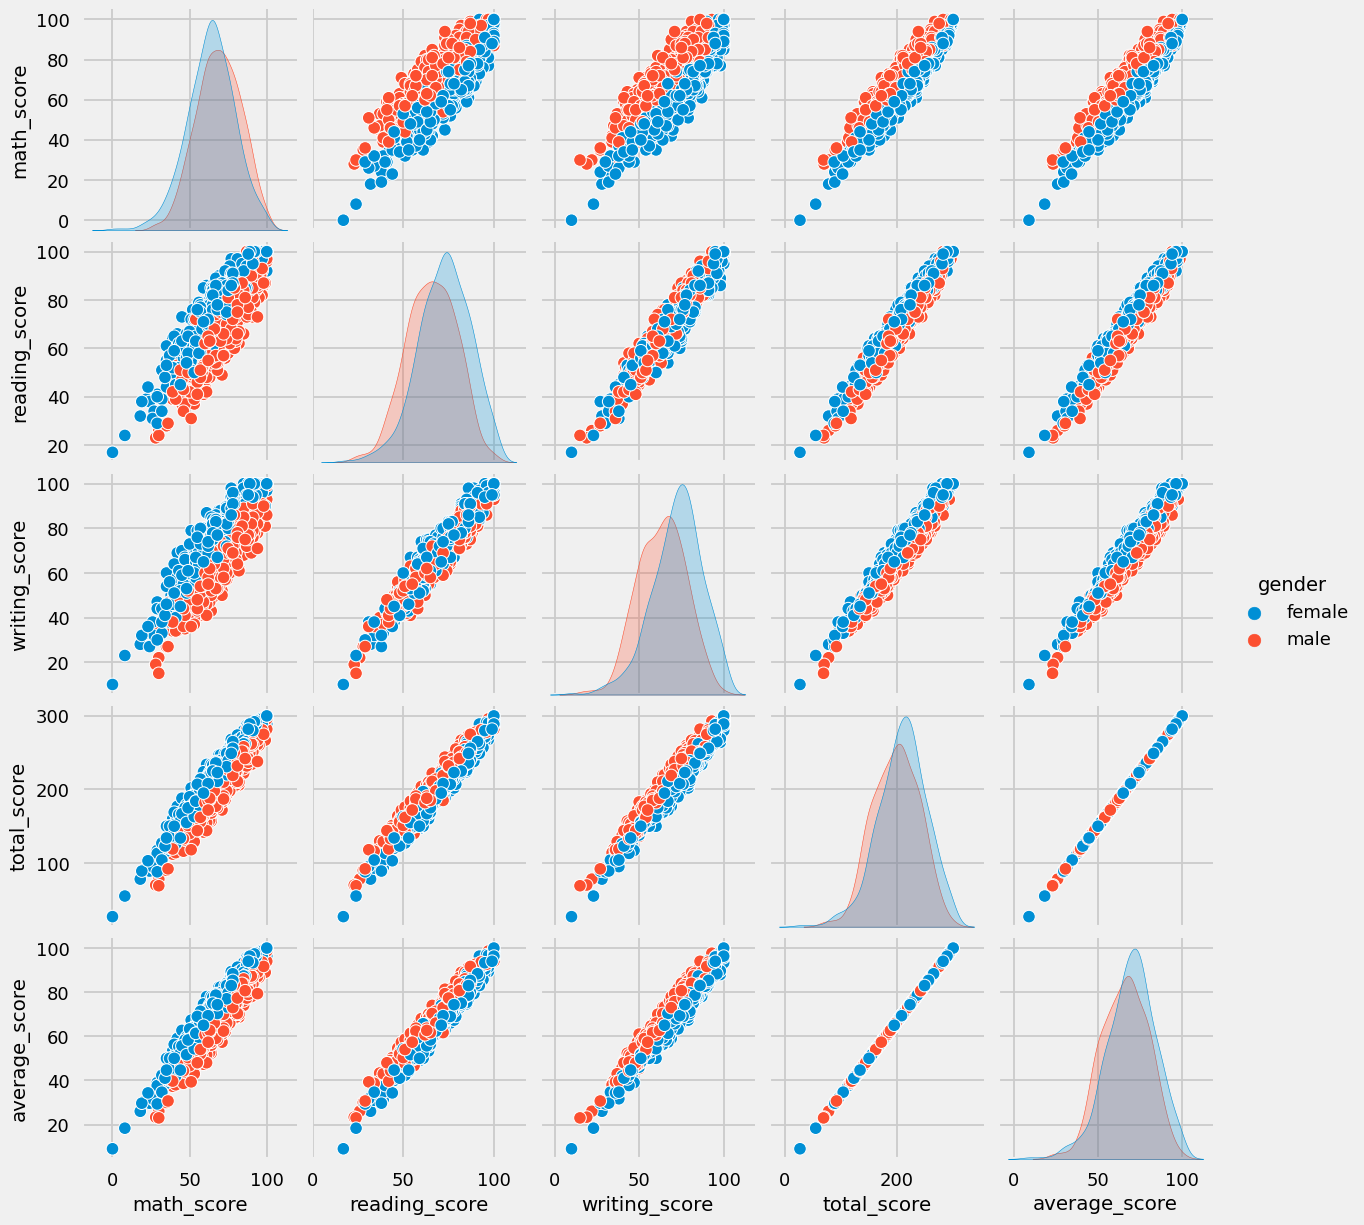

In [36]:
sns.pairplot(df, hue='gender')
plt.show()

**remarks**:<br>
- the scores tend to increase linearly with the other scores.